# Lecture 9 — Bayesian Statistical Inference: II

[Open this notebook in Google Colab](https://colab.research.google.com/github/daanmeerburg/Statistics_meerburg_2026//blob/main/Lectures/Lecture_09_PDM.ipynb)


**Lecturer:** P. D. Meerburg 

*Heavily based on materials by Davide Gerosa (astroML, 2022) and collaborators. See [here](https://github.com/dgerosa/astrostatistics_bicocca_2023/blob/main/README.md) for credits.*

##### Reading:

- [Textbook](http://press.princeton.edu/titles/10159.html) Chapter 5.
- [Jake VanderPlas's blog "Frequentism and Bayesianism: A Practical Introduction"](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/)
- [Jake VanderPlas: "Frequentism and Bayesianism: A Python-driven Primer"](https://arxiv.org/abs/1411.5018)
- [Hogg, Bovy and Lang: "Data analysis recipes: Fitting a model to data"](https://arxiv.org/abs/1008.4686)



##### For those who want to dive deep:

- [Jake VanderPlas's workshop "Bayesian Astronomy"](https://github.com/jakevdp/BayesianAstronomy)
- [D. Sivia and J. Skilling: "Data Analysis: A Bayesian Tutorial"](https://www.amazon.com/Data-Analysis-Bayesian-Devinderjit-Sivia/dp/0198568320)
- [E.T. Jaynes: "Probability Theory: The Logic of Science"](http://bayes.wustl.edu/etj/prob/book.pdf)
- [E.T. Jaynes: "Confidence Intervals vs. Bayesian intervals"](http://bayes.wustl.edu/etj/articles/confidence.pdf)
- [This great explanation of confidence levels versus credible regions on Stackexchange](https://stats.stackexchange.com/questions/2272/whats-the-difference-between-a-confidence-interval-and-a-credible-interval/2287#2287)



___


>## Simple parameter estimation examples <a class="anchor" id="one"></a>

### Underlying Gaussian distribution with heteroscedastic Gaussian uncertainties <a class="anchor" id="onea"></a>

The final example we saw in the previous lecture dealt with Bayesian parameter estimation of a Gaussian distribution, for $\mu$ and $\sigma$. **But what if the values we measure $\{x_i\}$ also have a measurement uncertainty?** Crucially, we're dealing with two levels of spread then:

- the underlying distribution spread, $\sigma$, and 
- the measurement uncertainties of the data, $\{e_i\}$

The measurement uncertainties further blur the underlying distribution. In fact, if the uncertainties in that data are homoscedastic ($e_i = e$), the distribution of $\{x_i\}$ will be Gaussian, ***BUT*** **if the uncertainties are heteroscedastic the distribution of $\{x_i\}$ will be non-Gaussian!**

- The figure below shows a distribution of $10^6$ points drawn from $\mathcal{N}(0,1)$ and sampled with heteroscedastic Gaussian errors with widths, $e_i$, uniformly distributed between $0$ and $3$. 
- A linear superposition of these Gaussian distributions with widths equal to $\sqrt{1 + e_i^2}$ results in a non-Gaussian distribution. 
- The best-fit Gaussians centered on the sample median with widths equal to sample standard deviation and quartile-based $\sigma_G$ are shown for comparison.

![](https://www.astroml.org/_images/fig_distribution_gaussgauss_1.png)


We are interested in inferring the parameters $(\mu, \sigma)$ of an underlying
Gaussian distribution, but each data point $x_i$ is measured with its own
measurement uncertainty $e_i$. This means that even if the *true* distribution
has variance $\sigma^2$, each observation has an *effective* variance

$$
\sigma_{\text{eff}, i}^2 = \sigma^2 + e_i^2.
$$

This is the standard way heteroscedastic Gaussian errors combine: the intrinsic
scatter $\sigma^2$ adds in quadrature with the measurement error $e_i^2$.


Given this, the likelihood of observing a particular $x_i$ is

$$
p(x_i \mid \mu, \sigma) =
\frac{1}{\sqrt{2\pi(\sigma^2 + e_i^2)}}
\exp\!\left[
-\frac{(x_i - \mu)^2}{2(\sigma^2 + e_i^2)}
\right].
$$

Assuming independent measurements, the full likelihood is the product:

$$
L = \prod_{i=1}^N p(x_i \mid \mu, \sigma).
$$

Taking the logarithm gives

$$
\ln L =
-\frac{1}{2}\sum_{i=1}^N
\left[
\ln(\sigma^2 + e_i^2)
+ \frac{(x_i - \mu)^2}{\sigma^2 + e_i^2}
\right]
+ \text{constant}.
$$

---

We assume **uniform priors** on both $\mu$ and $\sigma$ over some finite
ranges. A uniform prior contributes only an additive constant in $\ln p$, so the
log-posterior is simply

$$
\ln p = \ln L + \text{constant},
$$

which is why the expression for $\ln p$ is identical to the expression for
$\ln L$ up to a constant:

$$
\ln p =
\mathrm{constant}
-\frac{1}{2}\sum_{i=1}^N
\left[
\ln(\sigma^2+e_i^2)
+ \frac{(x_i-\mu)^2}{\sigma^2+e_i^2}
\right].
$$


To find the MAP values, we differentiate the log-posterior with respect to
$\mu$:

$$
\frac{\partial}{\partial \mu} \ln p
=
\sum_{i=1}^N
\frac{x_i - \mu}{\sigma^2 + e_i^2}
= 0.
$$

Solving for $\mu$ gives

$$
\mu_0 =
\frac{
\sum_{i=1}^N x_i / (\sigma_0^2 + e_i^2)
}{
\sum_{i=1}^N 1 / (\sigma_0^2 + e_i^2)
}.
$$

This is a **weighted mean**, where each data point is weighted by
$1 / (\sigma_0^2 + e_i^2)$. Points with large measurement errors contribute
less to the inference of $\mu$.


If we differentiate the log-posterior with respect to $\sigma$ we obtain an
equation that involves both $\sigma^2$ and $\sigma^4$ in a nonlinear way.
Unlike the $\mu$ equation, this does **not** simplify into a solvable analytic
expression. Therefore, the MAP estimate $\sigma_0$ must be obtained
numerically (e.g., by scanning a grid, or using an optimizer).

This is common whenever:
- measurement errors vary from point to point (heteroscedasticity), or  
- the intrinsic scatter is itself a parameter to be inferred.

---

Because we cannot solve for $\sigma_0$ analytically, we evaluate $\ln p$ on a
grid of $(\mu, \sigma)$ values. This is straightforward to do numerically:

- choose a grid for $\mu$
- choose a grid for $\sigma$
- compute the log-posterior at each grid point using the formula above
- visualize with `imshow` or `contour`

The example considered here uses a dataset with:

- $N = 10$ measurements,
- true parameters $\mu = 1$, $\sigma = 1$,
- measurement errors $e_i$ drawn uniformly from $0 < e_i < 3$.

The plotted posterior shows how measurement noise and intrinsic scatter combine
to produce a joint probability surface for $(\mu, \sigma)$, with the ridge-like
shape characteristic of heteroscedastic problems.

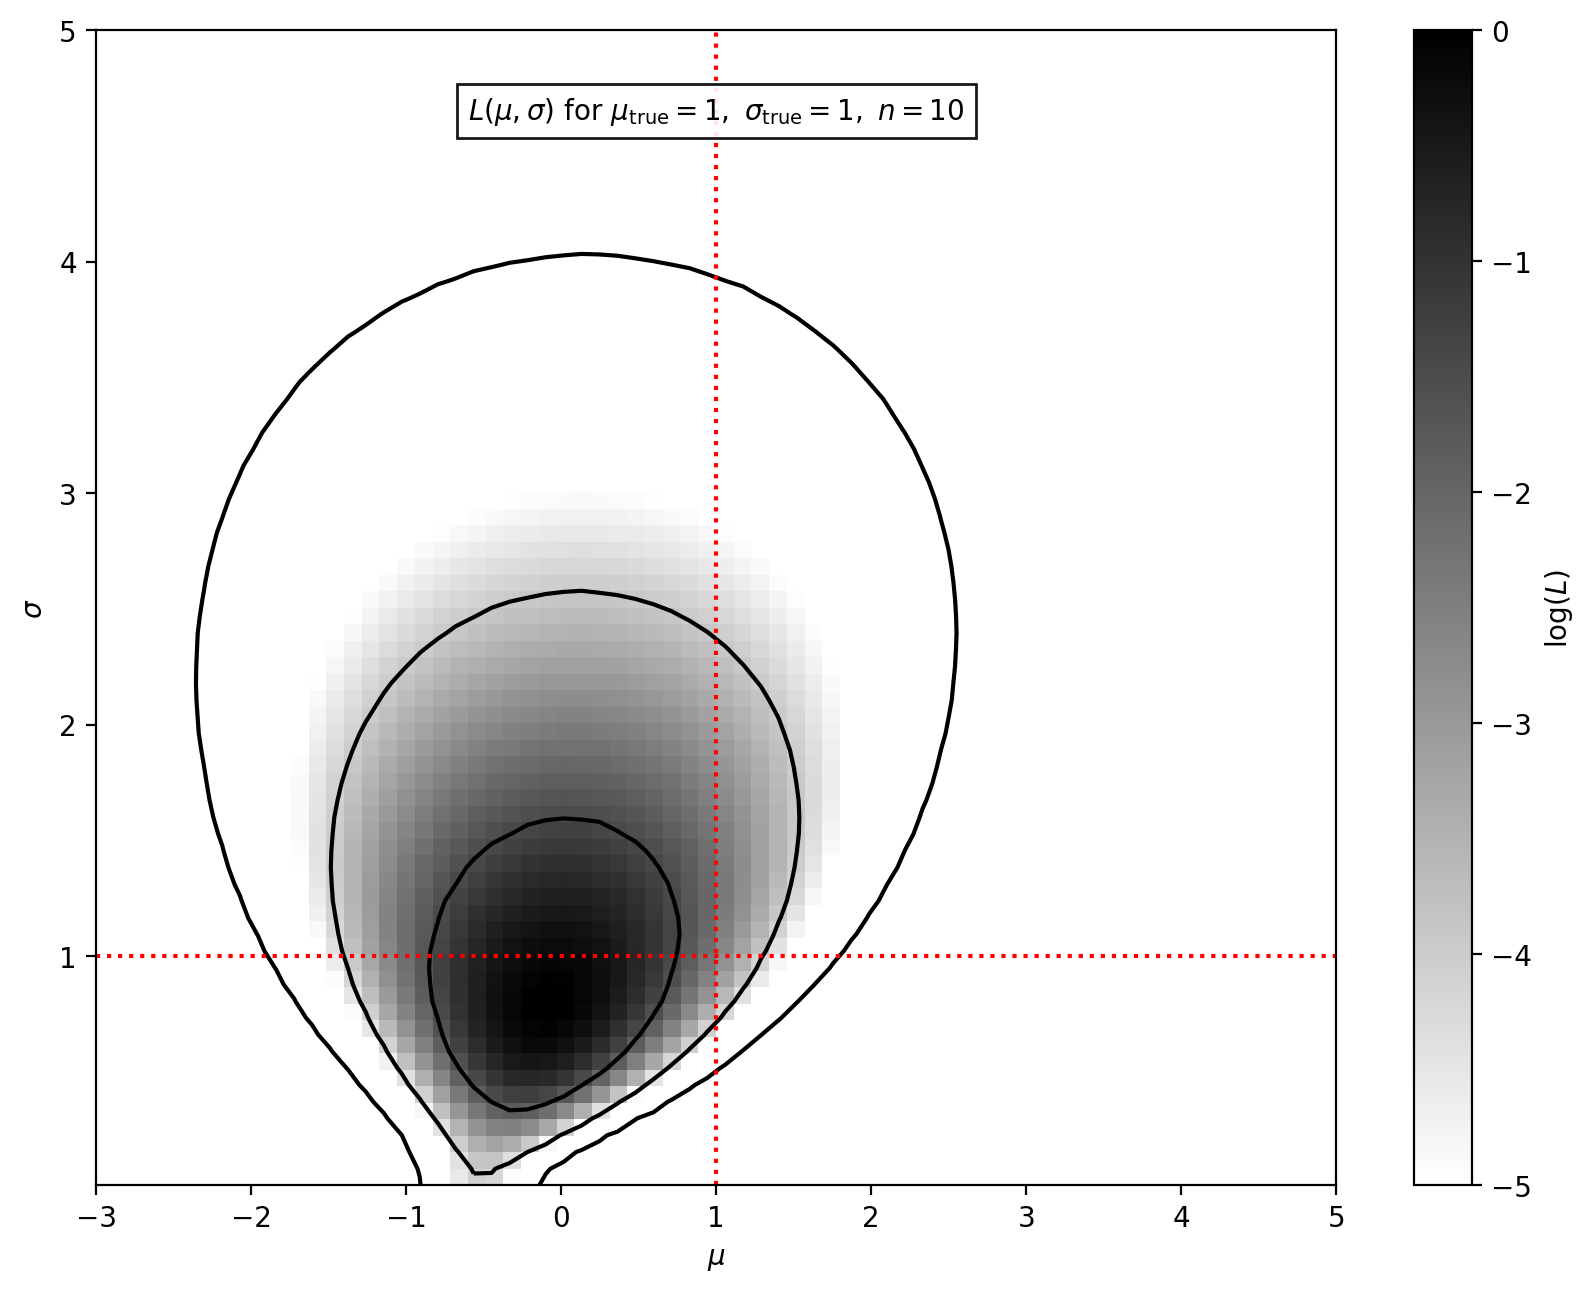

In [18]:
# Execute this cell
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
#np.random.seed(42)

"""
Gaussian Distribution with Gaussian Errors
------------------------------------------
Figure 5.7

The logarithm of the posterior probability density function for :math:`\mu`
and :math:`\sigma`, :math:`L_p(\mu,\sigma)`, for a Gaussian distribution with
heteroscedastic Gaussian measurement errors (sampled uniformly from the 0-3
interval), given by eq. 5.64. The input values are :math:`\mu = 1` and
:math:`\sigma = 1`, and a randomly generated sample has 10 points. Note that
the posterior pdf is not symmetric with respect to the :math:`\mu = 1` line,
and that the outermost contour, which encloses the region that contains 0.997
of the cumulative (integrated) posterior probability, allows solutions with
:math:`\sigma = 0`.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
#from astroML.plotting.mcmc import convert_to_stdev

#In the astroML library, but redefined here for completeness because it does not work with the current version of astroML (and this will work in google colab)
def convert_to_stdev(logp):  
    """
    Convert a log-posterior grid into cumulative probability content,
    suitable for contour plotting.
    """
    p = np.exp(logp - logp.max())
    p /= p.sum()

    p_flat = p.ravel()
    idx = np.argsort(p_flat)[::-1]

    cdf = np.cumsum(p_flat[idx])

    # Allocate output array
    cdf_grid = np.empty_like(p_flat)
    cdf_grid[idx] = cdf

    return cdf_grid.reshape(p.shape)

#the following is commented out because it requires astroML and the code does not work with the current version of python
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
# if "setup_text_plots" not in globals():
#     from astroML.plotting import setup_text_plots
# setup_text_plots(fontsize=13, usetex=False)

np.random.seed(42)
#------------------------------------------------------------
def gaussgauss_logL(xi, ei, mu, sigma): 
    """Equation 5.63: gaussian likelihood with gaussian errors"""
    ndim = len(np.broadcast(sigma, mu).shape)

    xi = xi.reshape(xi.shape + tuple(ndim * [1])) # reshape for broadcasting
    ei = ei.reshape(ei.shape + tuple(ndim * [1])) # reshape for broadcasting

    s2_e2 = sigma ** 2 + ei ** 2
    return -0.5 * np.sum(np.log(s2_e2) + (xi - mu) ** 2 / s2_e2, 0) # sum over data points

#------------------------------------------------------------
# Define the grid and compute logL
mu_true = 1.
sigma_true = 1.
N = 10 # number of data points
ei = 3 * np.random.random(N) # heteroscedastic errors(uniform 0-3)
xi = np.random.normal(mu_true, np.sqrt(sigma_true ** 2 + ei ** 2)) # data points 

sigma = np.linspace(0.01, 5, 70) # avoid sigma=0 to prevent division by zero
mu = np.linspace(-3, 5, 70) # mu grid

logL = gaussgauss_logL(xi, ei, mu, sigma[:, np.newaxis]) # compute logL on grid
logL -= logL.max() # normalize to max=0, logL -= logL.max() is equvalent to logL = logL - logL.max()

#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(10, 7.5))
plt.imshow(logL, origin='lower',
           extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap=plt.cm.binary,
           aspect='auto')
plt.colorbar().set_label(r'$\log(L)$')
plt.clim(-5, 0)

plt.text(0.5, 0.93,
         (r'$L(\mu,\sigma)\ \mathrm{for}\ \mu_{\rm true}=1,\ '
          r'\sigma_{\rm true}=1,\ n=10$'),
         bbox=dict(ec='k', fc='w', alpha=0.9),
         ha='center', va='center', transform=plt.gca().transAxes)

plt.contour(mu, sigma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='k')

plt.axhline(mu_true,c='red',ls='dotted')
plt.axvline(sigma_true,c='red',ls='dotted')

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

plt.show()


**Key takeaways**
- By eye,  $\mu=1$, $\sigma=1$ are not too far from the MAP parameter values. This is ok, but...
- The posterior pdf is not symmetric around $\mu=1$.
- In fact it is consistent within the $99.7\%$ credible region of having $\sigma=0$!. 
- The marginal distributions of each parameter would not look Gaussian either.


Now try changing the random seed, explain what's going one... Also try changin the number of datapoints as well as the maximum value of $e_i$.

---

### Gaussian distribution embedded in a uniform background distribution <a class="anchor" id="oneb"></a>

What if we wanted to **model the mixture of a Gauassian distribution with a uniform distribution**. The folliwing is the typical scenario for particle physicists looking for new particles. The following is from the [Atlas bulletin](https://atlas.cern/updates/feature/higgs-boson) of July 4th, 2018, showing the Higgs boson peak embdded in background noise and other particles.

![Atlas Higgs Boson Example](https://cds.cern.ch/record/2627611/files/Higgsto4l.png?subformat=icon-640)

Obviously this isn't *exactly* a Gaussian and a uniform distribution, but a line feature superimposed upon a background is the sort of thing that a physicist or astronomer might see and is pretty close to this case for a local region around the feature of interest. 

Q: Any more examples of similar problems in your research areas?

Let's assume that 
- the location parameter, $\mu$, is known (say from theory) and
- the uncertainties in $x_i$ are negligible compared to $\sigma$.

The likelihood of obtaining a single measurement, $x_i$, can be written as a probabilistic mixture of *either* the Gaussian *or* the uniform distribution. Hence, we use the **OR Rule** of probability:

$$p(x_i|A,\mu,\sigma,I) = \frac{A}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right) + \frac{1-A}{W}.$$

- Here the background probability is taken to be $0 < x < W$ and 0 otherwise.  
- The feature of interest lies between $0$ and $W$.  
- $A$ and $1-A$ are the relative strengths of the two components, which are obviously anti-correlated.  
- Note that there will be covariance between $A$ and $\sigma$. 

If we adopt a uniform prior in both $A$ and $\sigma$:

$$p(A,\sigma|I) = C, \; {\rm for} \; 0\le A<A_{\rm max} \; {\rm and} \; 0 \le \sigma \le \sigma_{\rm max},$$

then the posterior pdf is given by

$$\ln [p(A,\sigma|\{x_i\},\mu,W)] = \sum_{i=1}^N \ln \left[\frac{A}{\sigma \sqrt{2\pi}} \exp\left( \frac{-(x_i-\mu)^2}{2\sigma^2} \right)  + \frac{1-A}{W} \right].$$

The example below is for $200$ data points with $A=0.5, \sigma=1, \mu=5, W=10$. Specifically, the bottom panel is a result drawn from this distribution and the top panel is the likelihood distribution derived from the data in the bottom panel.

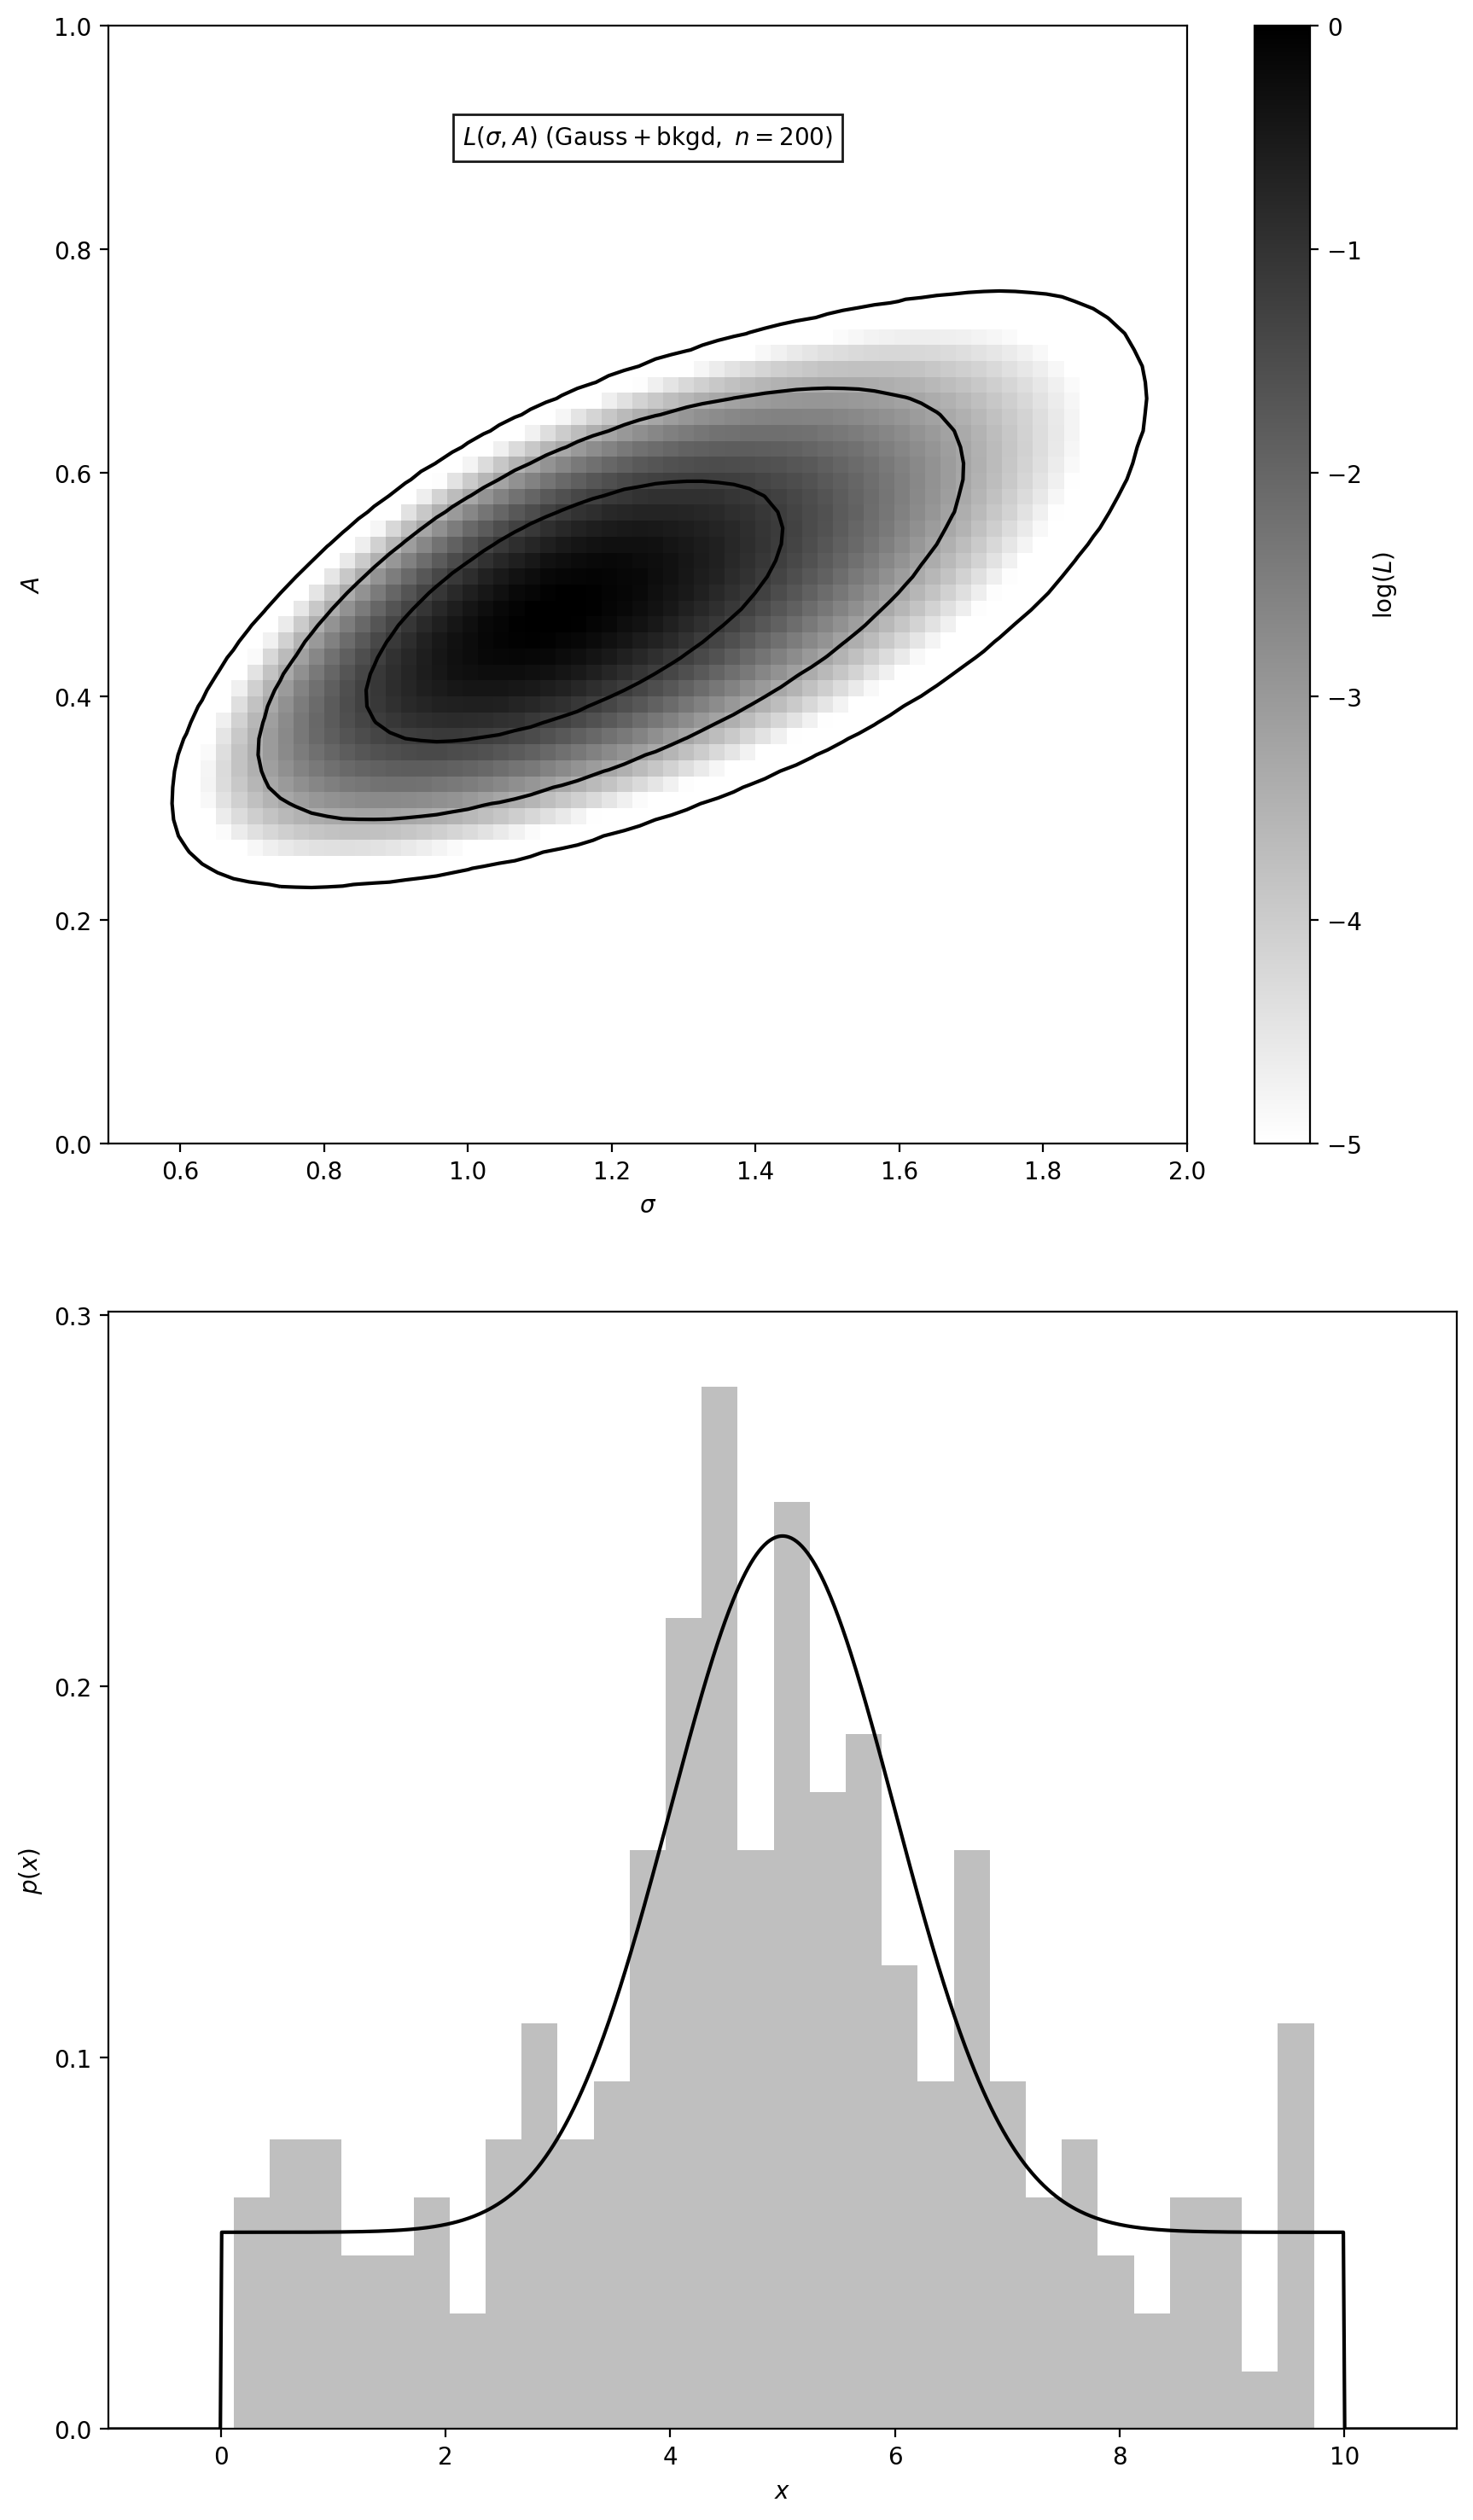

In [19]:
# %load ./code/fig_likelihood_gausslin.py
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from scipy.stats import truncnorm, uniform
#from astroML.plotting.mcmc import convert_to_stdev

def gausslin_logL(xi, A=0.5, sigma=1.0, mu=5.0, L=10.0):
    """Equation 5.80: gaussian likelihood with uniform background"""
    xi = np.asarray(xi)

    shape = np.broadcast(sigma, A, mu, L).shape

    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))

    return np.sum(np.log(A * np.exp(-0.5 * ((xi - mu) / sigma) ** 2)
                         / (sigma * np.sqrt(2 * np.pi))
                         + (1. - A) / L), 0) # sum over data points

#------------------------------------------------------------
# Define the distribution
np.random.seed(0)
mu = 5.0
sigma = 1.0
L = 10.0
A = 0.5
N = 200

xi = np.random.random(N)
NA = np.sum(xi < A)

dist1 = truncnorm((0 - mu) / sigma, (L - mu) / sigma, mu, sigma)
dist2 = uniform(0, 10)

xi[:NA] = dist1.rvs(NA)
xi[NA:] = dist2.rvs(N - NA)

x = np.linspace(-1, 11, 1000)
fracA = NA * 1. / N

#------------------------------------------------------------
# define the (sigma, A) grid and compute logL
sigma = np.linspace(0.5, 2, 70)
A = np.linspace(0, 1, 70)

logL = gausslin_logL(xi, A[:, np.newaxis], sigma)
logL -= logL.max()

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 16))
fig.subplots_adjust(bottom=0.07, left=0.11, hspace=0.15, top=0.95)

ax = fig.add_subplot(211)
plt.imshow(logL, origin='lower', aspect='auto',
           extent=(sigma[0], sigma[-1], A[0], A[-1]),
           cmap=plt.cm.binary)
plt.colorbar().set_label(r'$\log(L)$')
plt.clim(-5, 0)
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$A$')

ax.text(0.5, 0.9, r'$L(\sigma,A)\ (\mathrm{Gauss + bkgd},\ n=200)$',
        bbox=dict(ec='k', fc='w', alpha=0.9),
        ha='center', va='center', transform=plt.gca().transAxes)

ax.contour(sigma, A, convert_to_stdev(logL),
           levels=(0.683, 0.955, 0.997),
           colors='k')

ax2 = plt.subplot(212)
ax2.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax2.plot(x, fracA * dist1.pdf(x) + (1. - fracA) * dist2.pdf(x), '-k')
ax2.hist(xi, 30, density=True, histtype='stepfilled', fc='gray', alpha=0.5)

ax2.set_ylim(0, 0.301)
ax2.set_xlim(-1, 11)

ax2.set_xlabel('$x$')
ax2.set_ylabel('$p(x)$')
plt.show()

A more realistic example might be one where all three parameters are unknown: the location, the width, and the background level. *But that will have to wait until we learn about MCMC numerical techniques.* In lecture 6 we also considered multiple resonant peaks (with unknown width an location). 

---

>## Bayesian Model Comparison <a class="anchor" id="two"></a>

Model comparison and hypothesis testing in Bayesian inference are enormously different from classical/frequentist statistics. ***In Bayesian inference, we probabilistically rank models based on how well they explain the data under our prior knowledge.*** Let's look back at how we assessed goodness-of-fit and model choice in frequentist statistics. 

Let's use the example from http://jakevdp.github.io/blog/2015/08/07/frequentism-and-bayesianism-5-model-selection/
to illustrate some ideas about model selection.

In [20]:
#Execute this cell to load all of the modules we'll need and define the data array.
from scipy import stats
from scipy import optimize

# generate (x,y, sigma_y) "data" 
data = np.array([[ 0.42,  0.72,  0.  ,  0.3 ,  0.15,
                   0.09,  0.19,  0.35,  0.4 ,  0.54,
                   0.42,  0.69,  0.2 ,  0.88,  0.03,
                   0.67,  0.42,  0.56,  0.14,  0.2  ],
                 [ 0.33,  0.41, -0.25,  0.01, -0.05,
                  -0.05, -0.12,  0.26,  0.29,  0.39, 
                   0.31,  0.42, -0.01,  0.58, -0.2 ,
                   0.52,  0.15,  0.32, -0.13, -0.09 ],
                 [ 0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1  ]])

x,y, sigma_y = data

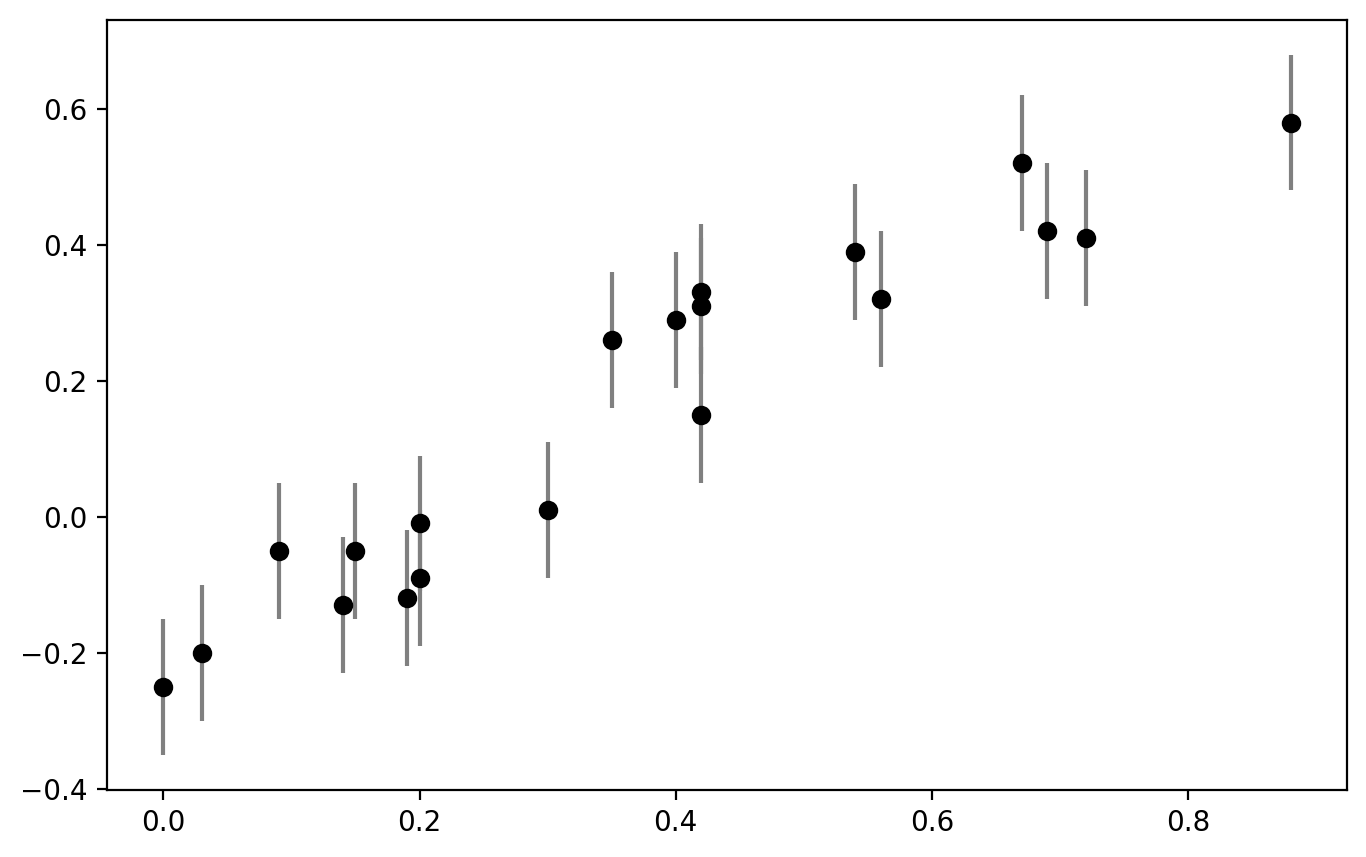

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray');

Is this data linear or quadratic?

In [22]:
#Functions to do a polynomial fit, compute the likelihood, and determine the best-fit parameters.

def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x) # compute model prediction
    return sum(stats.norm.logpdf(*args) for args in zip(y, y_fit, sigma_y))

# a direct optimization approach is used to get best model 
# parameters (which minimize -logL)
def best_theta(degree, model=polynomial_fit, data=data):
    theta_0 = (degree + 1) * [0]
    neg_logL = lambda theta: -logL(theta, data, model) # we minimize -logL
    return optimize.fmin_bfgs(neg_logL, theta_0, disp=False)

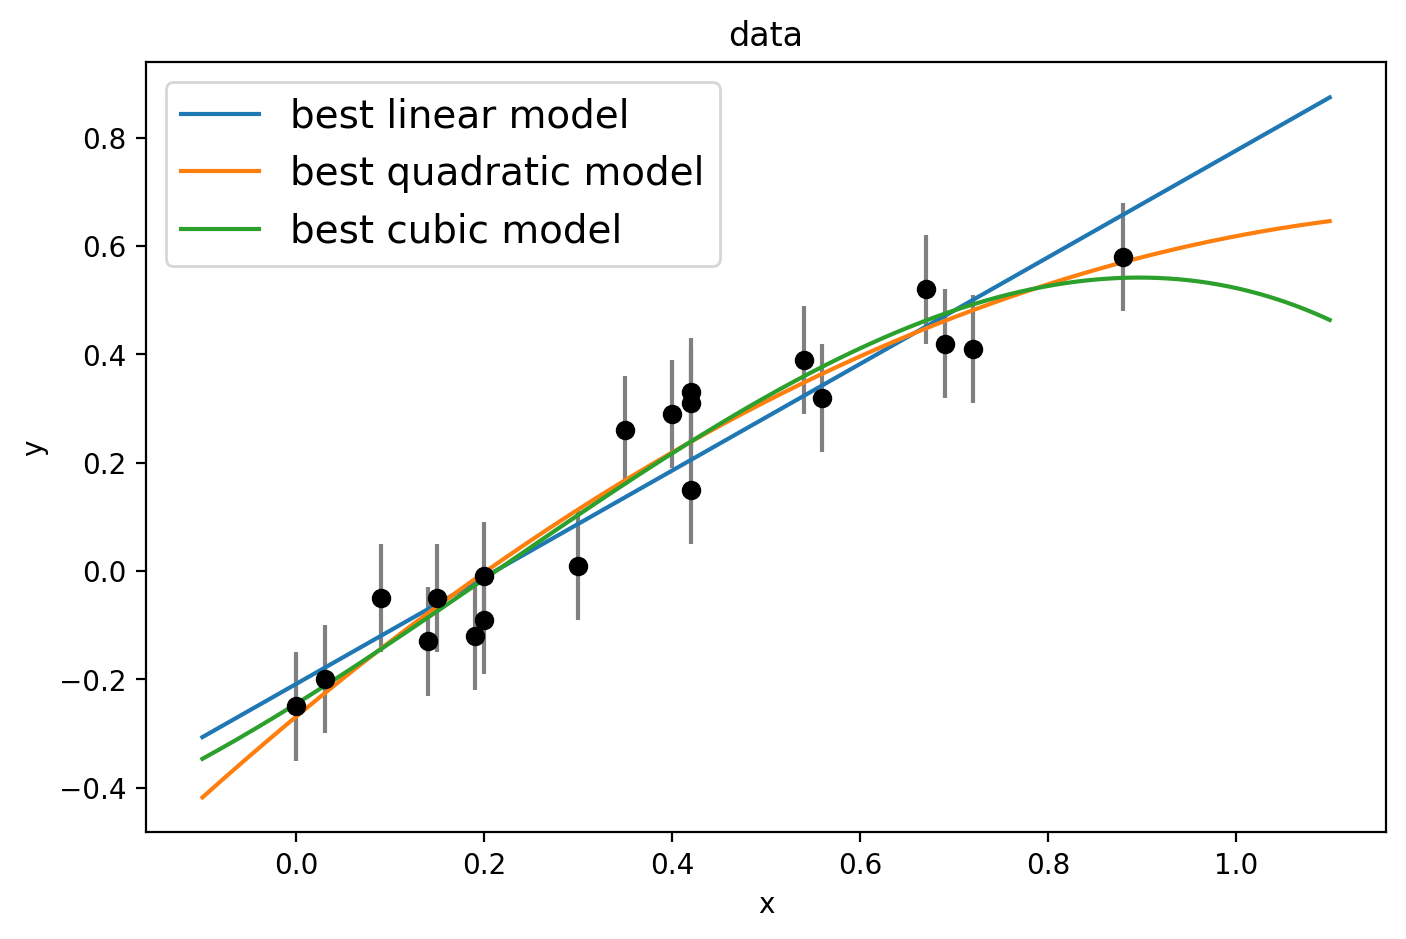

In [23]:
#Execute this cell.  See if you understand what it is doing.
x, y, sigma_y = data
Ndata = x.size

# get best-fit parameters for linear, quadratic and cubic models
theta1 = best_theta(1, data=data)
theta2 = best_theta(2, data=data)
theta3 = best_theta(3, data=data)
# generate best fit lines on a fine grid 
xgrid = np.linspace(-0.1, 1.1, 1000)
yfit1 = polynomial_fit(theta1, xgrid)
yfit2 = polynomial_fit(theta2, xgrid)
yfit3 = polynomial_fit(theta3, xgrid)

# plot 
fig, ax = plt.subplots(figsize=(8, 5))
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
ax.plot(xgrid, yfit1, label='best linear model')
ax.plot(xgrid, yfit2, label='best quadratic model')
ax.plot(xgrid, yfit3, label='best cubic model')
ax.legend(loc='best', fontsize=14)
ax.set(xlabel='x', ylabel='y', title='data');

We can use $\chi^2$ per degree of freedom to determine which fit is "best".  It is computed as 

$$ \chi^2_\mathrm{dof}  = \frac{1}{N-k} \sum_i^N \left( \frac{y - y_\mathrm{fit}}{\sigma_y} \right)^2, $$

where $N$ is the number of data points and $k$ is the number of free model parameters (here 2, 3, and 4).

For large values of $(N-k)$ (larger than about 10), the distribution of 
$\chi^2$ per degre of freedom is approximately Gaussian with a width of
$\sigma=\sqrt{2/(N-k)}$. 

In [24]:
#Compute chi2: sum{[(y-yfit)/sigma_y]^2} 
chi21 = np.sum(((y-polynomial_fit(theta1, x))/sigma_y)**2) 
chi22 = np.sum(((y-polynomial_fit(theta2, x))/sigma_y)**2) 
chi23 = np.sum(((y-polynomial_fit(theta3, x))/sigma_y)**2) 
# normalize by the number of degrees of freedom
# the number of fitted parameters is 2, 3, 4
chi2dof1 = chi21/(Ndata - 2)
chi2dof2 = chi22/(Ndata - 3)
chi2dof3 = chi23/(Ndata - 4)

print("CHI2:")
print('   best linear model:', chi21)
print('   best quadratic model:', chi22)
print('   best cubic model:', chi23)
print("CHI2 per degree of freedom:")
print('   best linear model:', chi2dof1)
print('   best quadratic model:', chi2dof2)
print('   best cubic model:', chi2dof3)

CHI2:
   best linear model: 11.499462014956965
   best quadratic model: 9.291258246116401
   best cubic model: 8.979208294675372
CHI2 per degree of freedom:
   best linear model: 0.6388590008309425
   best quadratic model: 0.5465446027127294
   best cubic model: 0.5612005184172107


**Which model should we adopt?**

Obviously, the cubic model has the lowest $\chi2$ ("fits the best"), but 
it has 4 free parameters while the linear model has only 2 free parameters.

**How do we trade improvement in $\chi^2$ with increasing model complexity?**

**Occam’s razor:**
> *All else being equal (i.e., each model fits the data equally well), the less complex model is favored.*

This principle was already known to [Ptolemy](https://www.wikiwand.com/en/Ptolemy) (circa 100-170 AD) who said: *“We consider it a good principle to explain the phenomena by the simplest hypothesis possible.”*

In [28]:
#we can use AIC or BIC to compare the models as well
#AIC = 2k - 2ln(L)
#BIC = k ln(n) - 2ln(L)
k1 = 2
logL1 = -chi21/2  # for gaussian likelihood, logL = -chi2/2
AIC1 = 2*k1 - 2*logL1
BIC1 = k1 * np.log(Ndata) - 2*logL1
k2 = 3
logL2 = -chi22/2   
AIC2 = 2*k2 - 2*logL2
BIC2 = k2 * np.log(Ndata) - 2*logL2
k3 = 4
logL3 = -chi23/2
AIC3 = 2*k3 - 2*logL3
BIC3 = k3 * np.log(Ndata) - 2*logL3
print("AIC:")
print('   best linear model:', AIC1)
print('   best quadratic model:', AIC2)
print('   best cubic model:', AIC3)
print("BIC:")
print('   best linear model:', BIC1)
print('   best quadratic model:', BIC2)
print('   best cubic model:', BIC3)


AIC:
   best linear model: 15.499462014956965
   best quadratic model: 15.291258246116401
   best cubic model: 16.979208294675374
BIC:
   best linear model: 17.490926562064946
   best quadratic model: 18.278455066778374
   best cubic model: 20.962137388891335


>## Bayesian Model Comparison

We start with Bayes' Theorem,

$$ \mathrm{Posterior} = \frac{\mathrm{Likelihood}\times\mathrm{Prior}}{\mathrm{Evidence}} $$

$$p(M,\theta \,|\,D,I) = \frac{p(D\,|\,M,\theta,I)\,\times p(M,\theta\,|\,I)}{p(D\,|\,I)},$$

and marginalize over model parameter space $\theta$
to obtain **the probability of model $M$** given the data $D$ and prior information $I$:

$$p(M\,|\,D,I) \equiv \int p(M,\theta \,|\,D,I) \, d\theta = 
      \int \frac{p(D\,|\,M,\theta,I)\,p(M,\theta\,|\,I)}{p(D\,|\,I)} \, d\theta =
      \frac{p(M\,|\,I)}{p(D\,|\,I)} \int p(D\,|\,M,\theta,I)\,p(\theta\,|\,M,I) \, d\theta  ,$$
where we used that 
$$ p(M,\theta\,|\,I) = p(M\,|\,I) p(\theta\,|\,M,I)
$$ 
and all terms that do not depend on $\theta$ can be taken out of the integral. 
 
#### Odds Ratios \& Bayes Factors

To determine which model is better we compute the ratio of the posterior probabilities or the **odds ratio** for two models as

$$O_{21} \equiv \frac{p(M_2|D,I)}{p(M_1|D,I)}.$$

The posterior probability that the model $M$ is correct given data $D$ (a number between 0 and 1) is

$$p(M|D,I) = \frac{p(D|M,I)p(M|I)}{p(D|I)},$$

the odds ratio can ignore $p(D|I)$ since it  will be the same for both models.  

We get 

$$O_{21} = \frac{p(D\,|\,M_2,I)\,p(M_2\,|\,I)}{p(D\,|\,M_1,I)\,p(M_1\,|\,I)} \equiv B_{21} \, \frac{p(M_2\,|\,I)}{p(M_1\,|\,I)},$$

where $B_{21}$ is called the **Bayes factor**. 

- The Bayes factor compares how well the models fit the data. 
- It is a ratio of data likelihoods averaged over all allowed values of the model parameters. 
- If two models fit the data equally well, the "winner" is decided based on priors. 

And this makes perfect sense! Consider a noisy image of a source which is equally likely to be a star or a galaxy. 
The posterior probability that the source is a star will greatly depend on whether we are looking 
at the Galactic plane or not. 

![](https://cdn.mos.cms.futurecdn.net/F2hDqo3nTCxLrbo68HPEUE-970-80.jpg.webp)


#### Bayesian Evidence 

We can compute 

$$ E(M) \equiv p(D\,|\,M, I) = \int p(D\,|\,M, \theta, I) \, p(\theta\,|\,M, I) \, d\theta, $$

where $E(M)$ is called **the marginal likelihood for model $M$ (or "evidence" or "fully marginalized likelihood")** and it quantifies the probability that the  data $D$ would be observed if the model $M$ were the correct model. *Note: the symbol for Bayesian evidence is sometimes $\mathcal{Z}$; check for context!*

The evidence is a weighted average of the likelihood function with the prior $I$ for model parameters acting as the weighting function. 

In standard parameter estimation, this is equivalent to the denominator in Bayes' theorem. Say you want to measure a parameter $\theta$ from a model $M$ (like we did with the fit above) one can write

$$p(\theta | D, M) = \frac{p(D | \theta, M) p(\theta | M)}{p(D|M)}$$

so that's precisely the term that we ignored so far (we set it to 1).


#### How do we interpret the values of the odds ratio in practice?

**Jeffreys** proposed a scale for interpreting the odds ratio, where $O_{21} > 10$ represents *“strong”* evidence in favor of $M_2$ ($M_2$  is ten times more probable than $M_1$), and $O_{21} > 100$ is *“decisive”* evidence ($M_2$ is one hundred  times more probable than $M_1$). When $O_{21} < 3$, the evidence is *“not worth more than a bare mention.”*

The table below uses Bayes factors, which are numerically equivalent to odds ratios whenever we ascribe equal priors odds to our models.

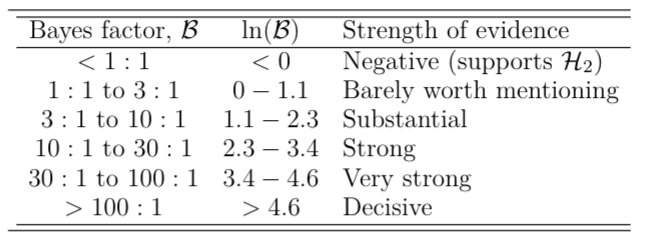

But note:
  * These are just **definitions of conventions**, i.e., a way to give a quantitative meaning to qualitative phrases.
  * The odds ratio **compares** the models, it doesn't tell us about the *absolute* goodness of fit: model A can be 100x better than model B, but still be pretty lousy.
  * Remember: "***GIGO***" ***= Garbage In, Garbage Out***. If we use our powerful statistics to rank a bunch of lousy models, that's our fault.

### Hypothesis Testing

In *hypothesis testing* we are essentially comparing a model, $M_1$, to its complement.  That is $p(M_1) + p(M_2) = 1$.  If we take $M_1$ to be the "null" (default) hypothesis (which is generally that, for example, a correlation does *not* exist), then we are asking whether or not the data reject the null hypothesis.

- In **classical hypothesis testing** we can ask whether or not a single model provides a good description of the data.  
- In **Bayesian hypothesis testing**, we need to have an alternative model to compare to.


[Here](https://arxiv.org/abs/2511.10631) is an example of a recent paper from my research field **cosmology**. In this paper the authors compared
the standard cosmological model, $\Lambda$ CDM (with a constant dark energy equation of state),
against models with **evolving dark energy**. In particular, a recent Bayesian model comparison
applied to DESI DR2 Baryon Acoustic Oscillation (BAO), Planck CMB, and supernova data used
nested sampling to compute the **Bayesian evidence** for a dynamic dark energy parametrization
($w_0w_a$ CDM) and the standard $\Lambda$ CDM model. While frequentist analyses based on
significance tests report a $\sim3.1\sigma$ preference for evolving dark energy, the Bayesian
evidence, which naturally penalizes extra parameters, modestly favours $\Lambda$ CDM when
considering CMB+BAO data alone, and favours the evolving dark energy model when supernova
data are included [arXiv:2511.10631]. This illustrates how cosmologists use hypothesis testing
and model comparison — both frequentist and Bayesian — to assess whether extensions to the
standard cosmological model are supported by the data, and how different statistical approaches
can lead to different conclusions about the same physical question.  



---

### Example of Cauchy Versus Gaussian Model Comparison <a class="anchor" id="twoa"></a>

We now draw a sample from a Cauchy distribution (remember, it has heavy tails!) and perform Bayesian Model Comparison for Cauchy and Gaussian models. The Bayesian evidence is computed as a direct brute-force numerical integral over parameter space-- no MCMC methods are used here.

In [26]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from scipy.stats import cauchy, norm
from scipy import integrate



def logL_cauchy(xi, gamma, mu,
                mu_min=-10, mu_max=10, sigma_min=0.01, sigma_max=100):
    """Equation 5.74: cauchy likelihood"""
    xi = np.asarray(xi)
    n = xi.size
    shape = np.broadcast(gamma, mu).shape

    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))

    prior_normalization = - (np.log(mu_max - mu_min)
                             + np.log(np.log(sigma_max / sigma_min)))

    return (prior_normalization
            - n * np.log(np.pi)
            + (n - 1) * np.log(gamma)
            - np.sum(np.log(gamma ** 2 + (xi - mu) ** 2), 0))


def logL_gaussian(xi, sigma, mu,
                  mu_min=-10, mu_max=10, sigma_min=0.01, sigma_max=100):
    """Equation 5.57: gaussian likelihood"""
    xi = np.asarray(xi)
    n = xi.size
    shape = np.broadcast(sigma, mu).shape

    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))

    prior_normalization = - (np.log(mu_max - mu_min)
                             + np.log(np.log(sigma_max / sigma_min)))

    return (prior_normalization
            - 0.5 * n * np.log(2 * np.pi)
            - (n + 1) * np.log(sigma)
            - np.sum(0.5 * ((xi - mu) / sigma) ** 2, 0))


def calculate_odds_ratio(xi, epsrel=1E-8, epsabs=1E-15):
    """
    Compute the odds ratio by perfoming a double integral
    over the likelihood space.
    """
    gauss_Ifunc = lambda mu, sigma: np.exp(logL_gaussian(xi, mu, sigma))
    cauchy_Ifunc = lambda mu, gamma: np.exp(logL_cauchy(xi, mu, gamma))

    I_gauss, err_gauss = integrate.dblquad(gauss_Ifunc, -np.inf, np.inf,
                                           lambda x: 0, lambda x: np.inf,
                                           epsabs=epsabs, epsrel=epsrel)
    I_cauchy, err_cauchy = integrate.dblquad(cauchy_Ifunc, -np.inf, np.inf,
                                             lambda x: 0, lambda x: np.inf,
                                             epsabs=epsabs, epsrel=epsrel)

    if I_gauss == 0:
        O_CG = np.inf
        err_O_CG = np.inf
    else:
        O_CG = I_cauchy / I_gauss
        err_O_CG = O_CG * np.sqrt((err_gauss / I_gauss) ** 2)

    return (I_gauss, err_gauss), (I_cauchy, err_cauchy), (O_CG, err_O_CG)


#------------------------------------------------------------
# Draw points from a Cauchy distribution
np.random.seed(44)
mu = 0
gamma = 2
xi = cauchy(mu, gamma).rvs(100)

#------------------------------------------------------------
# compute the odds ratio for the first 10 points
((I_gauss, err_gauss),
 (I_cauchy, err_cauchy),
 (O_CG, err_O_CG)) = calculate_odds_ratio(xi[:10])

print("Results for first 10 points:")
print("  L(M = Cauchy) = %.2e +/- %.2e" % (I_cauchy, err_cauchy))
print("  L(M = Gauss)  = %.2e +/- %.2e" % (I_gauss, err_gauss))
print("Bayesian odds ratio of Cauchy-versus-Gaussian Models = %.3g +/- %.3g" % (O_CG, err_O_CG))

#------------------------------------------------------------
# calculate the results as a function of number of points
Nrange = np.arange(1, 101, 2)
Odds = np.zeros(Nrange.shape)
for i, N in enumerate(Nrange):
    res = calculate_odds_ratio(xi[:N])
    Odds[i] = res[2][0]

#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(8, 5))
fig.subplots_adjust(hspace=0.1)

ax1 = fig.add_subplot(211, yscale='log')
ax1.plot(Nrange, Odds, '-k')
ax1.set_ylabel(r'$O_\mathrm{CG}$ for $N$ points', fontsize=12)
ax1.set_xlim(0, 100)
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.yaxis.set_major_locator(plt.LogLocator(base=10000.0))
ax1.set_ylim(1e-3, 1e24)

ax2 = fig.add_subplot(212)
ax2.scatter(np.arange(1, len(xi) + 1), xi, lw=0, s=16, c='k')
ax2.set_xlim(0, 100)
ax2.set_xlabel('Sample Size $N$', fontsize=12)
ax2.set_ylabel('Sample Value', fontsize=12)

plt.show() 

Results for first 10 points:
  L(M = Cauchy) = 1.18e-12 +/- 5.39e-16
  L(M = Gauss)  = 8.09e-13 +/- 7.45e-16
Bayesian odds ratio of Cauchy-versus-Gaussian Models = 1.45 +/- 0.00134


KeyboardInterrupt: 

The odds ratio for the first 10 points is very close to unity ($O_{CG} = 1.45$) and is therefore inconclusive.
 
***Why do we get an inconclusive odds ratio?*** 
- With only 10 points, the probability of drawing at least one point far away from the mean, which would strongly argue against the Gaussian model, is fairly small. 
- As the number of data values is increased, the ability to discriminate between the models increases, too. 
- As the above figure shows, when we increase the size of the observed sample, the odds ratio quickly favors the  Cauchy over the Gaussian model.


In reality, things are not always that nice in realistic scenario. Careful that you don't not know your models well enough things can go terribly wrong as you increase the number of datapoints (for examples see e.g. work by my former colleages [Zimmerman et al 2019](https://arxiv.org/abs/1903.11008))

A similar cautionary story exists in **cosmology**, where adding more data does
not always make model comparison cleaner. A well-known example is the tension
between early-universe measurements of the Hubble constant (from the CMB,
primarily Planck) and late-universe measurements from the distance ladder. As
more precise supernova and BAO datasets were added, the discrepancy *grew*
rather than shrank, strongly suggesting that at least one of the underlying
models (the $\Lambda$ CDM cosmology or the astrophysical calibration models)
was misspecified. See for example the detailed model-comparison analysis in
[Riess et al. 2021](https://arxiv.org/abs/2112.04510),
[Bernal & Peacock 2018](https://arxiv.org/abs/1803.04470), and the review
by [Di Valentino et al. 2021](https://arxiv.org/abs/2103.01183). This is an
excellent illustration of how increasing the number of data points can actually
*amplify model tension* if the assumed models are incomplete.

An instructive particle-physics analogy is the long history of anomalies in
neutrino experiments, where adding more data sometimes pushed the statistical
preference toward (or away from) models involving sterile neutrinos.
MINOS, MiniBooNE, and reactor-neutrino experiments each collected more precise
datasets that *changed* the odds ratios between “3-neutrino” and “3+1 sterile”
models; in some cases the tension worsened as new data came in. See for example
the model-comparison discussions in
[MiniBooNE Collaboration 2018](https://arxiv.org/abs/1805.12028) and
[Gariazzo et al. 2017](https://arxiv.org/abs/1703.00860).
These cases show that with real experimental data, extra statistics do not
guarantee cleaner model selection — sometimes they expose the fact that one or
more models being compared are fundamentally inadequate.

### Example of Coin Flip Bayesian Model Comparison <a class="anchor" id="twob"></a>

Let's look at an example using coin flips. Let's assume we have $N$ draws and $k$ are "success" (say, heads). 

We will compare two hypotheses:

- **M1**: We trust the guy. The coin has a known heads probability $b_\ast$ (say, a fair coin with $b_\ast=0.5$), with a prior given by a delta function, $\delta(b-b_\ast)$,
- **M2**: They are cheating. The heads probability $b$ is unknown, with a uniform prior in the range 0–1.

Basically in **M1** we know about the fairness of the coin. In **M2** we don't know anything about the fairness of the coin.

The model that we need (parametrized by the probability of success $b$, with $k$ successes) is the *binomial distribution*:

  $$    p(k\,|\,b, N) = \frac{N!}{k! \, (N-k)!} \, b^k \, (1-b)^{N-k} .$$

For model **M2** the prior for $b$ is flat in the range 0-1 and the product of the data likelihood and prior is the same as above. However, for model **M1** the prior is a  delta function $\delta(b-b_\ast)$ and we get for the product of the data likelihood and prior (which picks out $b=b_\ast$) 

$$    p(k\,|\,b_\ast, N, M_1)\,p(b|M_1, I) = \frac{N!}{k! \, (N-k)!} \, b_\ast^k \, (1-b_\ast)^{N-k}. $$

Consequently, the **odds ratio** is given by 

$$ O_{21} = \int_0^1 \left(\frac{b}{b_\ast}\right)^k \left(\frac{1-b}{1-b_\ast}\right)^{N-k} db, $$

as illustrated in the following figure. 


#### Why does the odds ratio become an integral?

Earlier in the lecture we defined the **odds ratio** between two models (dropping the $I$ for brevity),

$$
O_{21} = \frac{p(D \mid M_2)}{p(D \mid M_1)},
$$

where each term in the numerator and denominator is the **Bayesian evidence**, i.e. the likelihood integrated over the model’s parameters weighted by the
model’s priors:

$$
p(D \mid M) = \int p(D \mid \theta, M)\, p(\theta \mid M)\, d\theta.
$$

In the coin-flip example the two models are:

- **Model M1**: the coin has **known** bias $b_*$. Parameter space is trivial (no free parameters). The evidence is simply the binomial likelihood evaluated at $b_*$.

- **Model M2**: the coin has **unknown** bias $b$, and the prior on $b$
  is uniform on \([0,1]\). The evidence is the **marginal likelihood** obtained by integrating over all
  possible biases weighted by the prior.

This is why an integral appears: **M2 has a free parameter** and we must
average (integrate) the likelihood over all allowed values of that parameter.


Under model $M_1$ (with known bias $b_*$) the evidence is

$$
p(k \mid N, M_1)
= \frac{N!}{k!(N-k)!}\, b_*^k (1-b_*)^{N-k}.
$$

Under model $M_2$ the evidence includes marginalization over $b$:

$$
p(k \mid N, M_2)
= \int_0^1
\frac{N!}{k!(N-k)!}\, b^k(1-b)^{N-k}\, db.
$$

The combinatorial prefactor cancels in the odds ratio. Dividing the two
expressions gives

$$
O_{21}
= \frac{p(k\mid N,M_2)}{p(k\mid N,M_1)}
= \int_0^1
\left(\frac{b}{b_*}\right)^k
\left(\frac{1-b}{1-b_*}\right)^{N-k}\, db.
$$

This is exactly the expression shown in the figure.

---

### Intuition

- Model $M_1$ is extremely “narrow”: it permits **only one** coin bias ($b=b_*$).  
- Model $M_2$ is much more flexible: it considers **all** possible biases with equal weight.  
- Thus the evidence for $M_2$ is an *average* of the likelihood over all
  possible $b$, while the evidence for $M_1$ is the likelihood at a single
  point.  
- With only a small number of coin flips, the likelihood is not sharply
  peaked, so the integral does not penalize $M_2$ very strongly.
- As $N$ increases, the integrand becomes sharply peaked and the evidence ratio
  decisively favors one model.

This example shows how Bayesian model comparison naturally incorporates both
model fit **and** model complexity through parameter marginalization.

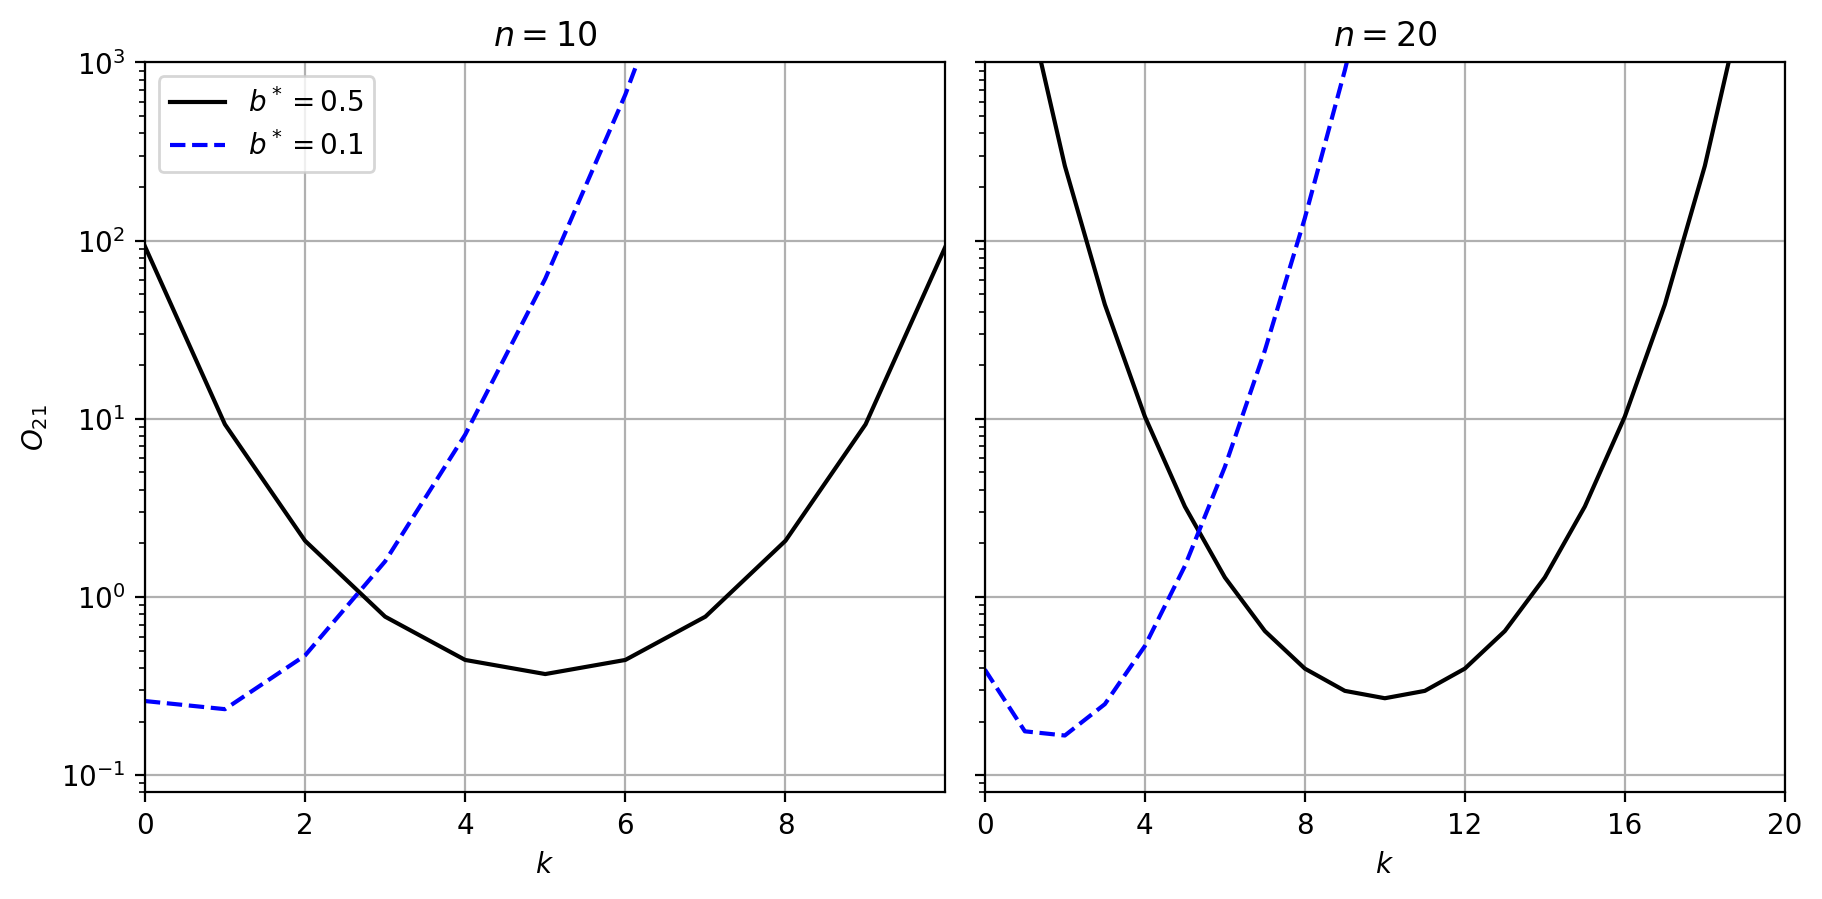

In [ ]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt



@np.vectorize # to allow array inputs
def odds_ratio(n, k, bstar):
    """Odds ratio between M_2, where the heads probability is unknown,
    and M_1, where the heads probability is known to be `bstar`, evaluated
    in the case of `k` heads observed in `n` tosses.

    Eqn. 5.25 in the text
    """
    factor = 1. / (bstar ** k * (1 - bstar) ** (n - k))
    f = lambda b: b ** k * (1 - b) ** (n - k)

    return factor * integrate.quad(f, 0, 1)[0]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(left=0.13, right=0.95, wspace=0.05, bottom=0.15)

subplots = [121, 122]
n_array = [10, 20]

linestyles = ['-k', '--b']
bstar_array = [0.5, 0.1]

for subplot, n in zip(subplots, n_array):
    ax = fig.add_subplot(subplot, yscale='log')
    k = np.arange(n + 1)

    # plot curves for two values of bstar
    for ls, bstar in zip(linestyles, bstar_array):
        ax.plot(k, odds_ratio(n, k, bstar), ls,
                label=r'$b^* = %.1f$' % bstar)

    if subplot == 121:
        ax.set_xlim(0, n - 0.01)
        ax.set_ylabel(r'$O_{21}$')
        ax.legend(loc=2)
    else:
        ax.set_xlim(0, n)
        ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_xlabel('$k$')
    ax.set_title('$n = %i$' % n)
    ax.set_ylim(8E-2, 1E3)
    ax.xaxis.set_major_locator(plt.MultipleLocator(n / 5))
    ax.grid()


plt.show()

And note the nice numpy trick `@np.vectorize`, which allows you to magically make a scalar function array-compatible. If you've never seen it, the `@` is a [python decorator](https://realpython.com/primer-on-python-decorators/), which an extremely powerful structure.

This figure illustrates the behavior of $O_{21}$ as a function of $k$ (number of successes) for two different values of $N$ and for two different values of $b_\ast$: $b_\ast = 0.5$  (**M1**: the coin is fair) and $b_\ast = 0.1$ (**M1**: the coin is biased to tails). 

*The ability to distinguish  the two hypothesis **improves** with the sample size.*

For example:
- when $b_\ast = 0.5$ and $k/N = 0.1$ ($k=1$ on the left and $k=2$ on the right), the odds ratio in favor of **M2** increases from $\sim 9$ for $N=10$ to $\sim 263$ for $N=20$. 
- when k = $b_\ast N$, the odds ratio is $0.37$ for $N=10$ and 0.27 for $N=20$. 
- **the simpler model is favored by the data**, and the support strengthens with the sample size. 

**NOTE** 
- *$O_{21}= \sqrt{\pi/(2N)}$ when k = $b_\ast N$ and $b_\ast = 0.5$.* 
- To build strong evidence that a coin is fair, $O_{21} < 0.1$, it takes as many as $N > 157$ tosses. 
- With N = 10,000, the heads probability of a fair coin is measured with a precision of 1% and the corresponding odds ratio is $O_{21} \approx 1/80$.

***Frequentist Versus Bayesian***

In the **frequentist approach**, we ask whether we can reject the "null hypothesis" that our coin is fair. Specifically, we ask whether a given $k$ is a very unusual outcome (at some significance level $\alpha$, say $\alpha=0.05$) for a fair coin with $b_\ast = 0.5$ and with a given N. 

In the **Bayesian approach**, we offer an alternative hypothesis that the coin has an unknown heads probability. While this probability can be estimated from provided data ($b_0$), **we consider all the possible values** of $b_0$ when comparing the two proposed hypotheses. 


The figure shows how the odds ratio

$$
O_{21} = \frac{p(D \mid M_2)}{p(D \mid M_1)},
$$

changes as a function of the observed number of heads for different total
numbers of tosses and different assumed coin biases in Model **M1**.

We compare two hypotheses:

**M1:** the coin has a known, fixed bias $b_* \in \{0.5,\; 0.1\}$ (a fair coin, or a coin biased toward tails).

**M2:** the coin has an unknown bias $0 \le b \le 1$ with a uniform prior.

Model **M1** is simple: it contains no free parameters.  
Model **M2** is flexible: it allows all possible values of the bias.  
The odds ratio tells us which model is better supported by the data.

If the observed fraction of heads $\frac{k}{N}$ is very different from the fixed value predicted by **M1**, $b_*$, then Model **M1** becomes unlikely and $O_{21} \gg 1$. If the observed fraction agrees well with $b_*$, then the simpler model wins: $O_{21} \ll 1$ . As the number of tosses grows, the likelihood becomes sharper. $
N \uparrow \quad \Rightarrow \quad \text{likelihood narrows} \quad \Rightarrow 
\quad \text{stronger evidence for one model}.
$


Let us look at some concrete examples. Suppose **M1** is a fair coin, $b_* = 0.5$, but we observe $\frac{k}{N} = 0.1.$
Then we have:

- For \(N = 10\): $O_{21} \approx 9$

- For \(N = 20\): $O_{21} \approx 263$

As $N$ doubles, the evidence against the fair-coin hypothesis becomes **dramatic**.

Now suppose the observed number of heads satisfies $k = b_* N$. For a fair coin $b_* = 0.5$ this means exactly half heads.

Then we find

- For \(N = 10\): $ O_{21} \approx 0.37$

- For \(N = 20\): $O_{21} \approx 0.27$


Hence **M1** is favored, and the support improves with more data.

---


When $b_* = 0.5$ and the data satisfy $k = b_* N$, the odds ratio is

$$
O_{21} = \sqrt{\frac{\pi}{2N}}.
$$

This gives simple rules of thumb:

- To obtain strong evidence for a fair coin,

  $$
  O_{21} < 0.1,
  $$

  we need

  $$
  N > 157 .
  $$

- With

  $$
  N = 10\,000,
  $$

  we can measure the heads probability to the 1% level, and

  $$
  O_{21} \approx \frac{1}{80}.
  $$

The fair-coin model is strongly favored.

---

### Frequentist vs Bayesian interpretations

**Frequentist view:**  
We test the null hypothesis

$$
H_0: b_* = 0.5
$$

and compute the probability of observing a result as extreme as $k$. If this
probability is below a chosen threshold $\alpha$, we reject $H_0$.

**Bayesian view:**  
We compare two explicit models:

- a fair coin with fixed bias $b_*$,
- a coin with unknown bias $b$:

  $$
  0 \le b \le 1.
  $$

We compute the evidences

$$
p(D \mid M_1), \qquad p(D \mid M_2)
$$

and form the odds ratio

$$
O_{21} = \frac{p(D \mid M_2)}{p(D \mid M_1)}.
$$

In this framework, the appearance of an **integral** is natural:  
Model **M2** requires marginalizing over all possible values of \(b\).

The two approaches answer different questions:

- Frequentists ask: *Is this outcome unlikely for a fair coin?*
- Bayesians ask: *Which model (fair vs unknown bias) is more probable given the data?*

## Approximate Bayesian Model Comparison <a class="anchor" id="three"></a>

While the full *Odds Ratio* is the ultimate goal, it can be costly to compute. So we have some *approximate methods* that balance between ***goodness of fit*** and ***model complexity***. 

### Akaike information criterion (AIC) 

We've seen this before! 

$${\rm AIC} \equiv -2 \ln [L_0(M)] + 2k + \frac{2k(k+1)}{N-k-1}.$$

### Bayesian information criterion (BIC)

- The BIC is new to us. 
- It can be derived from the Bayesian odds ratio by assuming that the likelihood is Gaussian (see $\S$5.4.2 in textbook for details). 
- It's easier to compute than the odds ratio because it is based on the maximum value of the likelihood, $L_0(M)$, rather than on the integration of the likelihood over the full parameter space (i.e. evidence $E(M)$). 

For $N$ data points and a model with $k$ parameters,

$$
{\rm BIC} \equiv -2 \ln(L_0(M)) + k \ln(N)
$$

where 
- the 1st term is equal to the model's $\chi^2$ (under the assumption of normality; note that this is not $\chi^2$ per degree of freedom!) and 
- the 2nd term on the RHS penalizes complex models relative to simple ones.

When two models are compared, **the model with the smaller BIC/AIC value wins**. If the models are equally successful in describing the data (i.e., they have the same value of $L_0(M)$), then the model with fewer free parameters wins. 

Let's use BIC to choose the best polynomial from the earlier line fitting example. 
Starting with

$$
{\rm BIC} = \chi^2 + k \ln(N),
$$

with $N=20$ we have:

<pre>
     model     chi2    k   k*ln(N)   BIC   
     ------------------------------------
    linear    11.32    2    5.99    17.31   
  quadratic    9.46    3    8.99    18.45   
     cubic     8.99    4   11.98    20.97  
</pre>

Therefore, **the improvement in $\chi^2$ for the quadratic model**, relative to the linear model, **is not large enough to justify another free model parameter.**

**BUT NOTE!** 
- The BIC and AIC are approximations and might not be valid if the underlying assumptions are not met.
- Furthermore, unlike the odds ratio, both of them penalize unconstrained parameters. The odds ratio does not care about unconstrained parameters.
- In general, it is better to compute the odds ratio when computationally feasible. 